# Exercises 19

Use edge detection methods, to find the watch numbers' edges, you can use denoising methods
before detecting edges!. ( the output has to be so clear, without any noise!)
input

## Import necessary libraries

In [1]:
import cv2  # OpenCV library for computer vision tasks
import matplotlib.pyplot as plt  # Library for data visualization
import numpy as np  # Library for numerical computing

In [3]:
def show_img_plt(img, c_map='gray', fig_height=8, fig_width=6, vmin=0, vmax=255):
    # Create a figure with specified dimensions
    plt.figure(figsize=(fig_height, fig_width), dpi=100)
    
    # Display the image using specified colormap and min/max values for color scaling
    plt.imshow(img, cmap=c_map, vmin=vmin, vmax=vmax)

In [4]:
def show_mult_img(rows, columns, img_names, vmin=0, vmax=255):
    # Define a figure with specified dimensions
    fig = plt.figure(figsize=(15, 17), dpi=100)
    
    # Loop through the image names and add them as subplots to the figure
    for i in range(len(img_names)):
        fig.add_subplot(rows, columns, i+1)  # Add a subplot
        
        # Display the image using grayscale cmap and specified min/max values for color scaling
        plt.imshow(img_names[i], cmap='gray', vmin=vmin, vmax=vmax)
        
        # Hide axis and set title for each subplot
        plt.axis('off')
        plt.title('img_' + str(i))

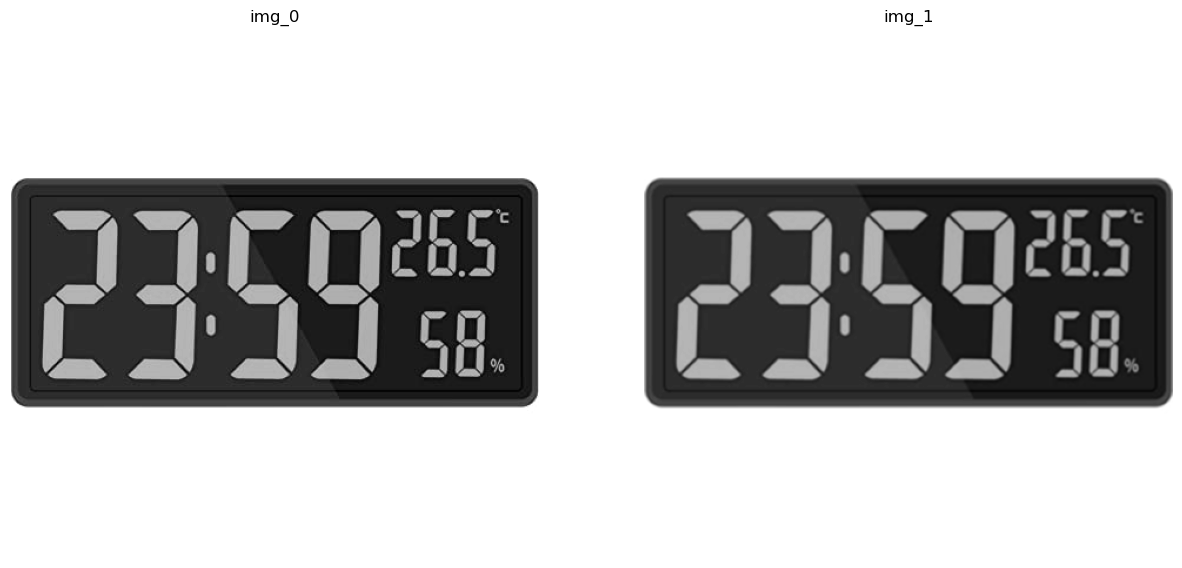

In [8]:
# Reading an image from a file and storing it in the 'img' variable
# The argument to the imread() function is the path to the image file
img = cv2.imread('img/input.jpg')

# Converting the color space of the image from BGR to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying Gaussian blur to the grayscale image to reduce noise
# The second argument to the GaussianBlur() function is the kernel size
# The third argument is the standard deviation of the Gaussian function
img_denoised = cv2.GaussianBlur(img_gray, (3, 3), 0)

# Displaying both the original grayscale image and the denoised image side by side
# The first argument to show_mult_img() specifies the number of rows of images to display
# The second argument specifies the number of columns of images to display
# The third argument is a tuple containing the images to be displayed
show_mult_img(1, 2, (img_gray, img_denoised))

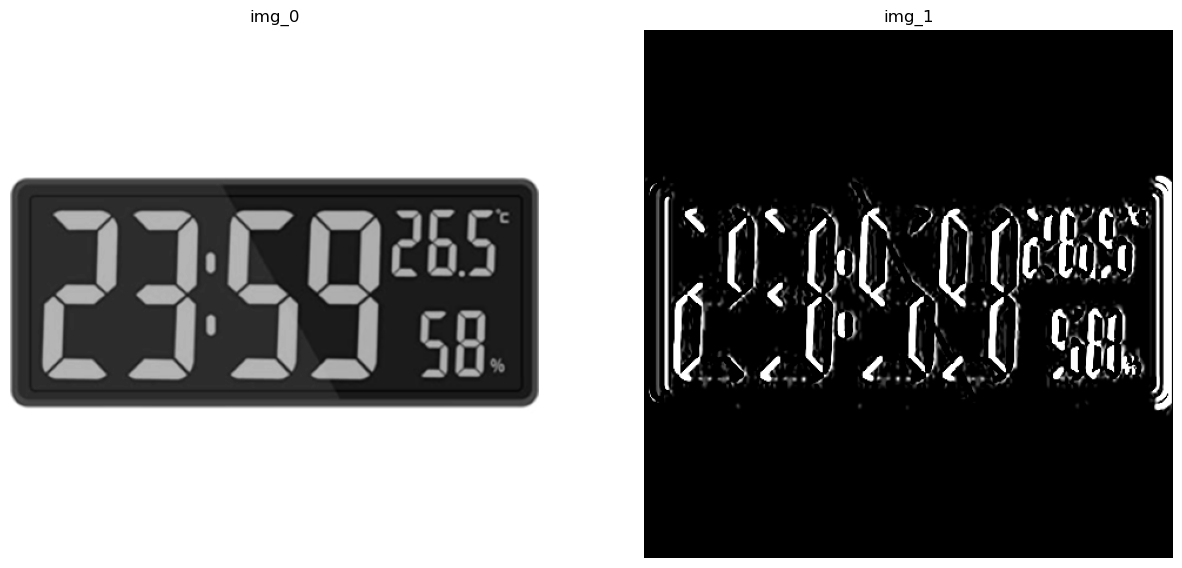

In [11]:
# Gradient with x Sobel kernel  
# This section is using a Sobel filter in the x direction to detect edges in an input image.
# img_denoised is the blurred version of the input image used for noise reduction.
# function is used to apply the Sobel filter to the blurred input image (img_denoised) with a kernel size of 5x5.
# ddepth=-1 means that the output image will have the same depth as the input image.
sobelx = cv2.Sobel(src=img_denoised, ddepth=-1, dx=1, dy=0, ksize=5)

# Displaying multiple images in one row.
# This method takes three arguments: number of rows, number of columns, and tuple of images.
show_mult_img(1, 2, (img_denoised, sobelx))


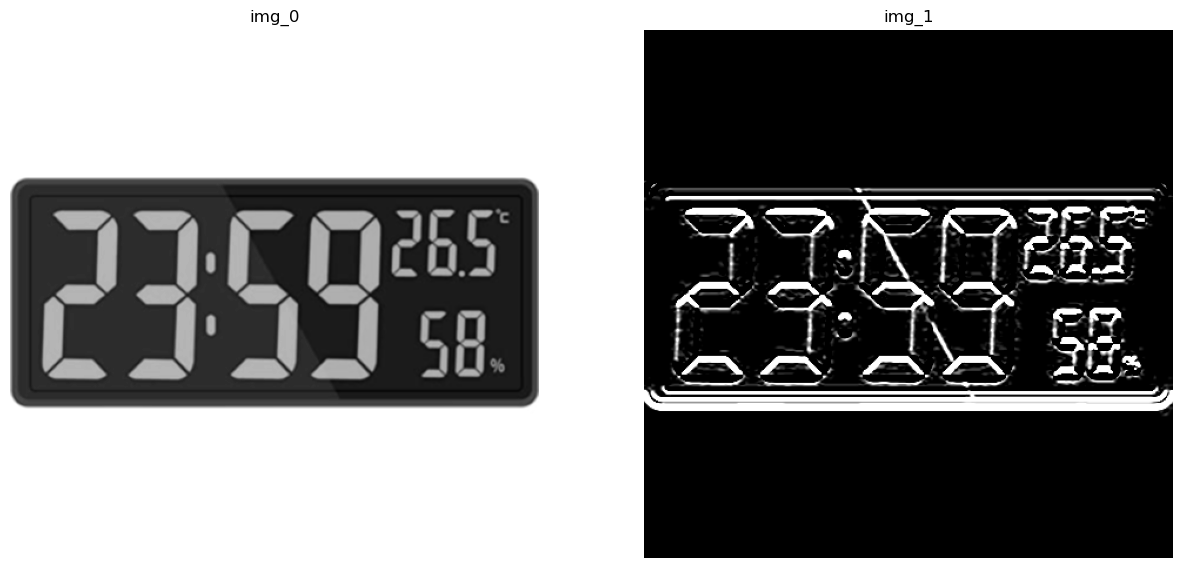

In [12]:
# Gradient with y Sobel kernel  
# This section is using a Sobel filter in the y direction to detect edges in an input image.
# img_blur is the blurred version of the input image used for noise reduction.
# function is used to apply the Sobel filter to the blurred input image (img_denoised) with a kernel size of 5x5
# ddepth=-1 means that the output image will have the same depth as the input image.
sobely = cv2.Sobel(src=img_denoised, ddepth=-1, dx=0, dy=1, ksize=5)

# Displaying multiple images in one row.
# This method takes three arguments: number of rows, number of columns, and tuple of images.
show_mult_img(1, 2, (img_denoised, sobely))


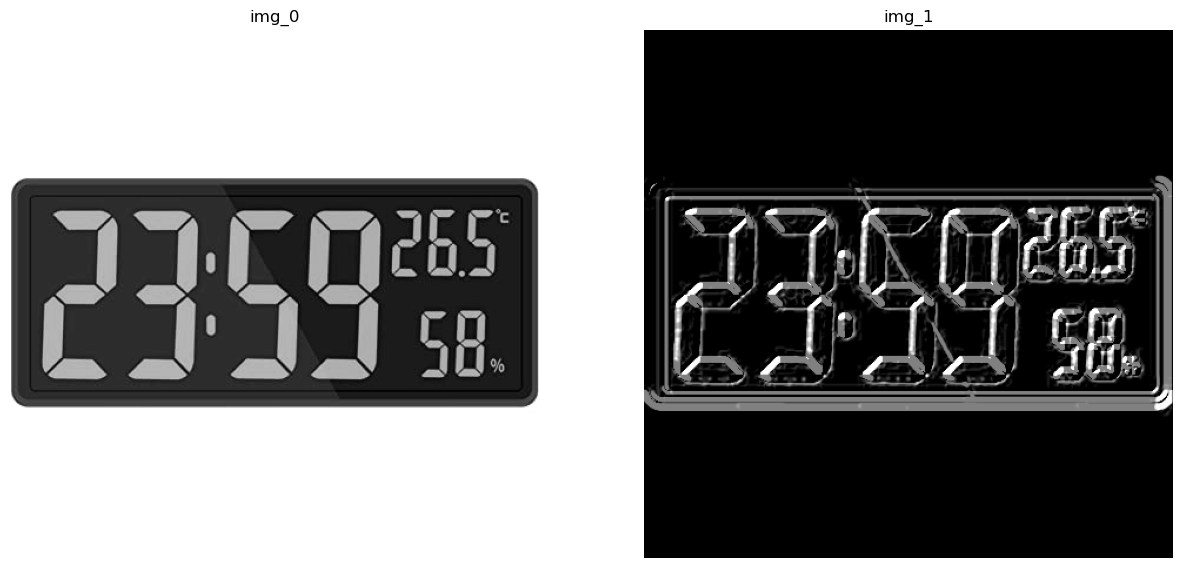

In [25]:
# Merging x-sobel and y-sobel
# First method for computing magnitude
# magnitude = ((sobelx)**2 + (sobely**2))**(1/2)
# Second method (better one) for computing magnitude
# magnitude = abs(sobelx) + abs(sobely)

# Compute gradient by adding weighted absolute values of sobelx and sobely
gradient = cv2.addWeighted(np.abs(sobelx), 0.5, np.abs(sobely), 0.5, 0)
# np.abs(sobelx)*0.5 + np.abs(sobely)*0.5 + 0

# Display grayscale image and gradient as two subplots in a single figure
show_mult_img(1, 2, (img_gray, gradient))


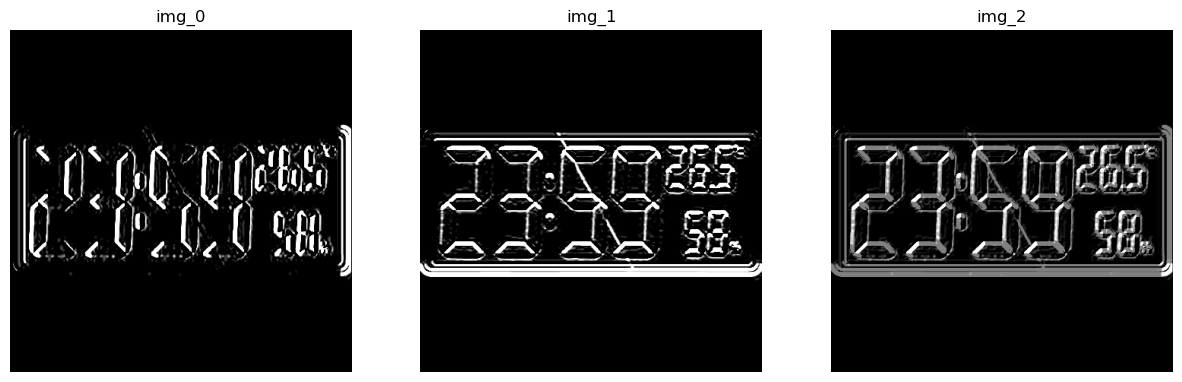

In [39]:
# Let's compare images with one another
show_mult_img(1, 3, (sobelx, sobely, gradient))

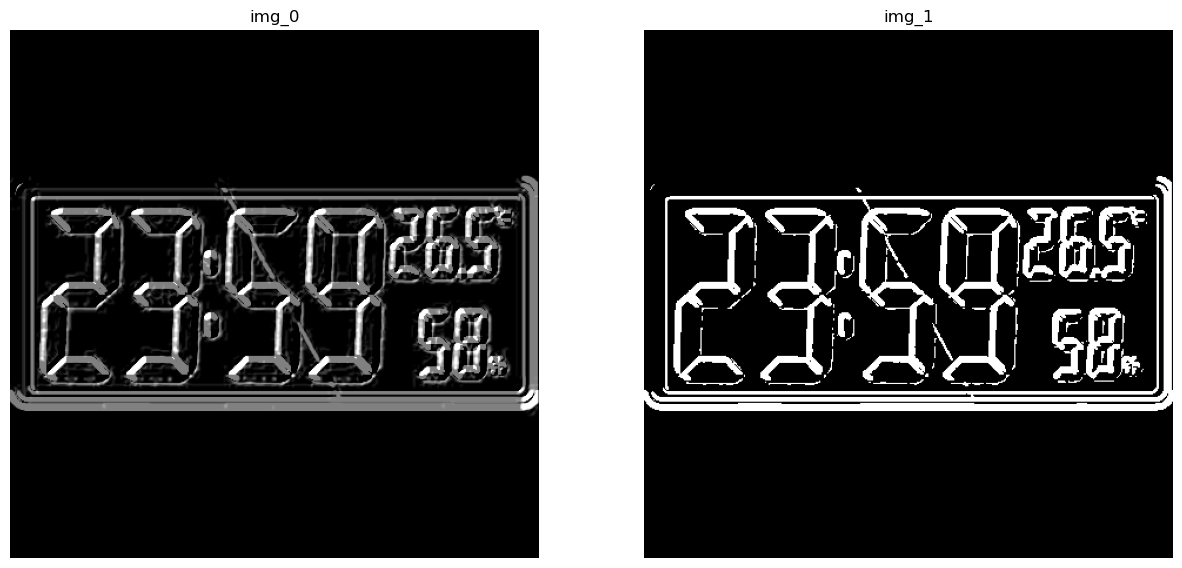

In [43]:
# Set threshold value to 127
threshold_value = 127

# Threshold the gradient image to obtain a binary image.
# Pixels with values less than the threshold value are set to 0,
# and those with values greater than or equal to the threshold value are set to 1.
# This is done to ignore detected edges that we do not need.
ret, thresh_gradient = cv2.threshold(gradient, threshold_value, 255, cv2.THRESH_BINARY)

# Display denoised image and thresholded image as two subplots in a single figure
show_mult_img(1, 2, (gradient, thresh_gradient))


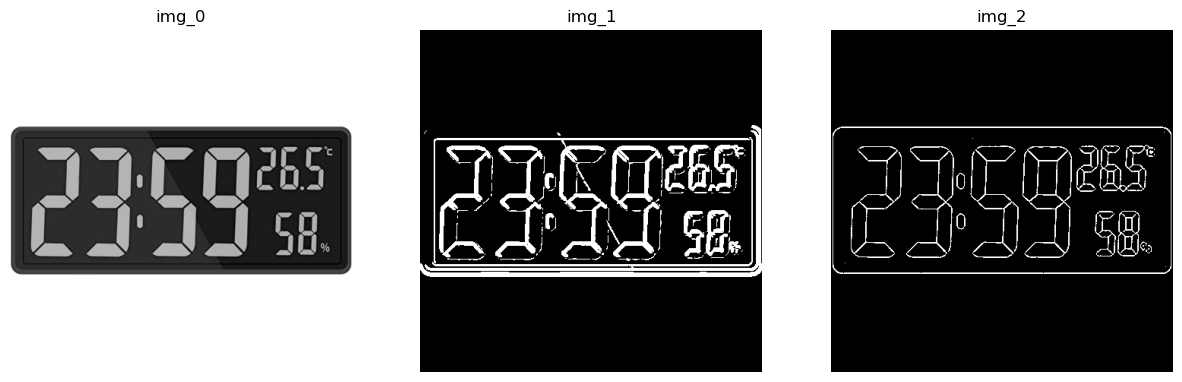

In [44]:
# Apply Laplacian operator to blurred image
laplacian = cv2.Laplacian(img_denoised, -1)

# Set threshold value to 20
threshold_value = 20

# Threshold the Laplacian image to obtain a binary image.
# Pixels with values less than the threshold value are set to 0,
# and those with values greater than or equal to the threshold value are set to 1.
ret, thresh_laplacian = cv2.threshold(laplacian, threshold_value, 255, cv2.THRESH_BINARY)

# Display original blurred image and thresholded image as two subplots in a single figure
show_mult_img(1, 3, (img_gray, thresh_gradient, thresh_laplacian))


## Canny
The Canny algorithm is a popular method for detecting edges in images due to its ability to accurately detect edges while suppressing noise. The Laplacian and gradient operators can also be used for edge detection, but they are typically more sensitive to noise than the Canny algorithm. Therefore, it is often recommended to use a combination of techniques for optimal results.

The cv2.Canny() function takes in the input image (img_gray or img_denoised) and two thresholds (threshold1 and threshold2). These thresholds control the strength of the edges detected: any edge with intensity gradient greater than threshold2 is considered a "strong" edge, and any edge between threshold1 and threshold2 is considered a "weak" edge. Edges below threshold1 are suppressed.

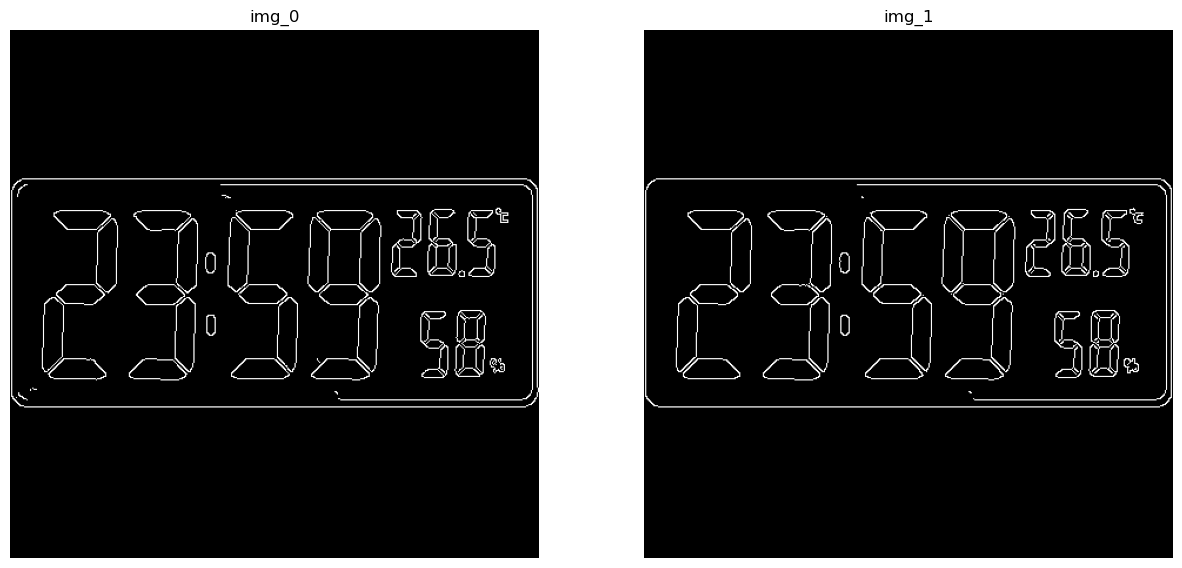

In [46]:
# Perform edge detection using a combination of the Canny algorithm, Laplacian operator, and gradient operator. 
# Gaussian denoising is also applied to the image prior to edge detection.
canny = cv2.Canny(image=img_gray, threshold1=120, threshold2=150)
canny_two_time_denoised = cv2.Canny(image=img_denoised, threshold1=120, threshold2=150)

# Display the original image next to the two edge detection results for comparison.
show_mult_img(1, 2, (canny, canny_two_time_denoised))

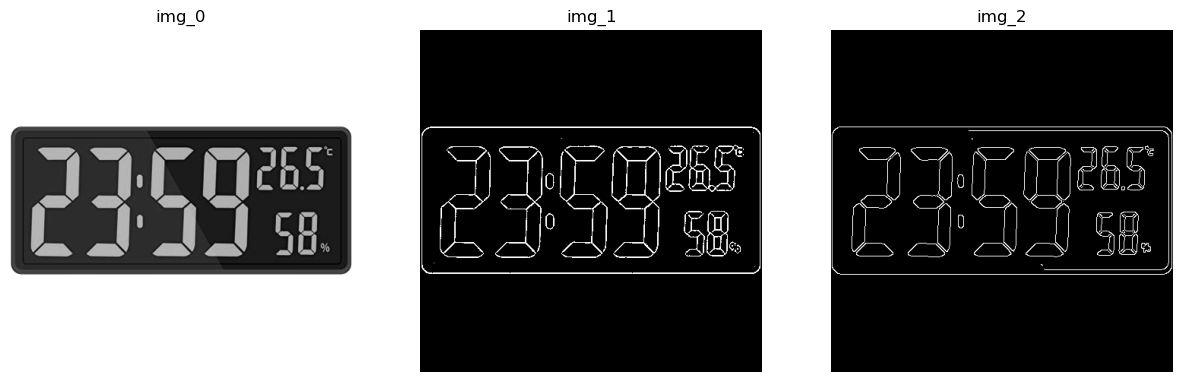

In [47]:
# Let's compare images with one another
show_mult_img(1, 3, (img_gray, thresh_laplacian, canny_two_time_denoised))